In [171]:
##Research Question:What types of properties are most commonly listed in New York City Airbnb Dataset and how the property type affect the price and availability for booking?

In [1]:
import pandas as pd
import seaborn  as sns
from matplotlib import pyplot as plt

In [2]:
Dataset=pd.read_csv('AB_NYC_2019.csv')

In [3]:
#The display.max_columns option controls the number of columns to be printed (none represent all the columns included in the dataset)
pd.set_option('display.max_columns', None)
#You can change the width of the column with the option max_colwidth (none represent the maximum characters included in a cell within the dataset) 
pd.set_option('max_colwidth', None)

In [4]:
Dataset

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [5]:
#The dataset involves 48895 rows and 16 columns 
Dataset.shape

(48895, 16)

In [6]:
#Check the data type of the variables within the dataset
Dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [178]:
#Transform the variables 'id' and 'host_id' from numerical variable into objects(we desrire these variables to be treated as objects and not numbers)
#For example it doesnt make sense to find the mean or median of the 'id' variable 
Dataset = Dataset.astype({'id': object,'host_id':object})

In [179]:
Dataset.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [180]:
#I have divided the last review_variabel into last_review_year,last_review_month and last_review_day for better exploration 
Dataset[['last_review_year','last_review_month','last_review_day']]=Dataset['last_review'].str.split('-',expand=True)

In [181]:
#Drop the last_review variable which we already divided in the previous step
Dataset=Dataset.drop(['last_review'], axis=1)

In [182]:
Dataset.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
last_review_year                   object
last_review_month                  object
last_review_day                    object
dtype: object

In [183]:
Dataset

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

      last_review_year last_review_month last_review_day  
0                 2018                10              19  
1                 2019                05              21  
2                  NaN               NaN             NaN  
3                 2019                07 

In [184]:
import missingno as msno

In [185]:
#We can observe that the most important variables we should take into cosideration have no missing values
#Therefore we should just ignore the the missing values and continue the exploration 
Dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
last_review_year                  10052
last_review_month                 10052
last_review_day                   10052
dtype: int64

<AxesSubplot:>

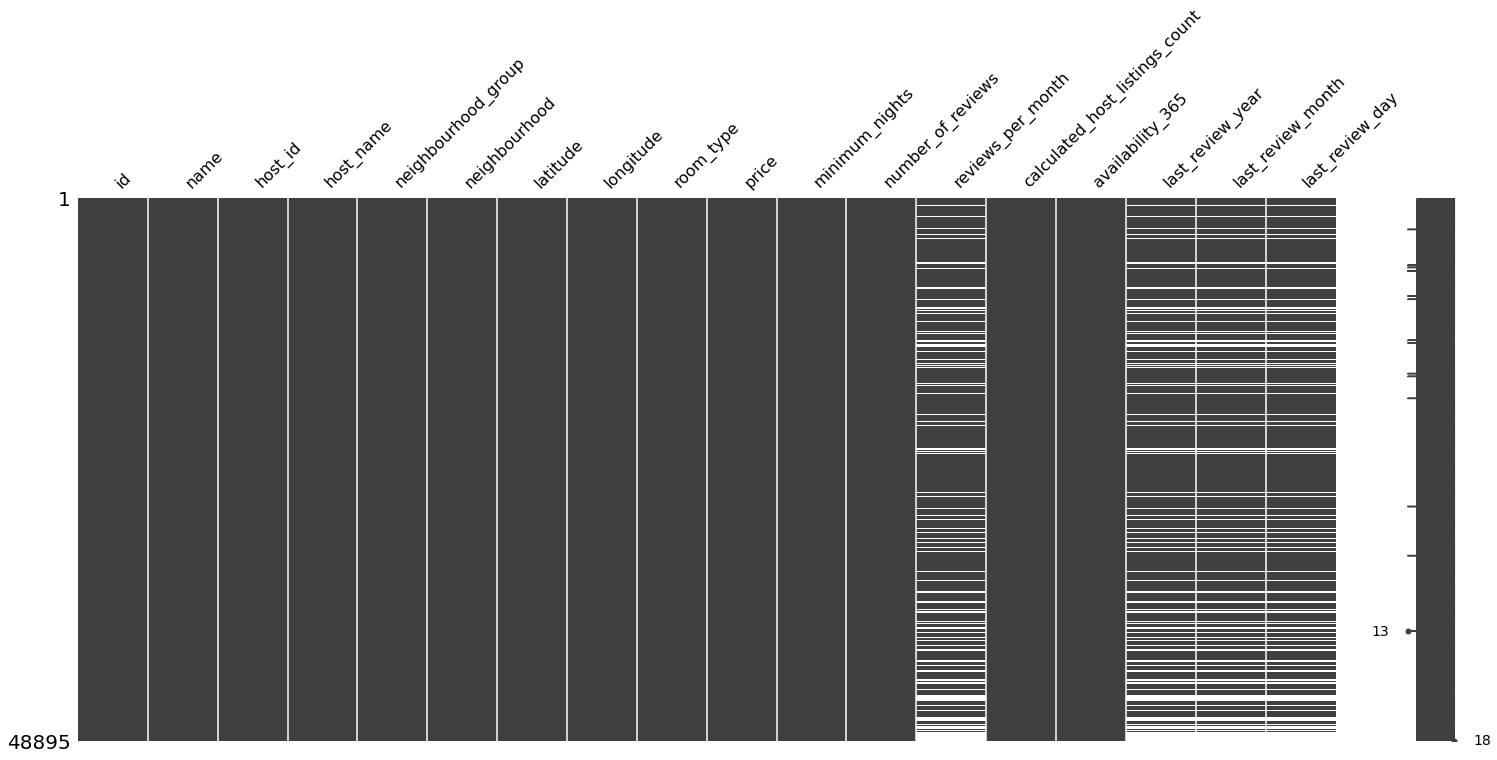

In [186]:
#This step helps us to understand where are the missing values located within our dataset
msno.matrix(Dataset)

In [187]:
#For the machine learning models we will take place we dont really need the variable with the missing values so we should just remove these variables
Dataset=Dataset.drop(['name','host_name','reviews_per_month','last_review_year','last_review_month','last_review_day'],axis='columns')

In [188]:
#Observe the relevant details of each object variable within the dataset
Dataset[['id','host_id','neighbourhood_group','neighbourhood','room_type']].describe()

id    host_id neighbourhood_group neighbourhood        room_type
count   48895      48895               48895         48895            48895
unique  48895      37457                   5           221                3
top      2539  219517861           Manhattan  Williamsburg  Entire home/apt
freq        1        327               21661          3920            25409

In [189]:
#The object variables within the dataset seem correct since:
#The 'id' variable which represents listing ID is unique as should be 
#Some hosts have in their property more than one residence which makes sense as well
#My only concern is that the host with number '219517861' has too many residences in his possession so that seems a little strange to me
#We have 5 unique locations in which the properties exist which makes sense
#We have 221 unique areas(neighbourhoud) in which the properties exist which makes sense
#We have 3 unique room types which makes sense as well

In [190]:
#Below we can observe the summary statistics of the numerical variables of our dataset 
Dataset[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean           23.274466                        7.143982        112.781327  
std            44.550582                       32.952519        131.622289  
min             0.000000                        1.000000          0.000000  
25%             1.000000                        1.000000          0.000000  
50%             5.000000                        1.000000         45.000000  
75%            24.000000                        2.000000        227.000000  
max           629.000000                      327.000000        365.000000

In [191]:
#We can observe that the latitude and longitude variable have a very small standard deviation and thus data are clustered around the mean values(This indicates that the properties are located close by to each other)
#The unusual measure in relevance to the price is that the min value is 0.00.These are propably records which habe been written incorrectly so we should drop these records.In addition there are too many outliers within this variable that makes me a little concerned as regards the validity of the records 

In [192]:
Dataset[Dataset.price==0]

id    host_id neighbourhood_group       neighbourhood  latitude  \
23161  18750597    8993084            Brooklyn  Bedford-Stuyvesant  40.69023   
25433  20333471  131697576               Bronx     East Morrisania  40.83296   
25634  20523843   15787004            Brooklyn            Bushwick  40.69467   
25753  20608117    1641537            Brooklyn          Greenpoint  40.72462   
25778  20624541   10132166            Brooklyn        Williamsburg  40.70838   
25794  20639628   86327101            Brooklyn  Bedford-Stuyvesant  40.68173   
25795  20639792   86327101            Brooklyn  Bedford-Stuyvesant  40.68279   
25796  20639914   86327101            Brooklyn  Bedford-Stuyvesant  40.68258   
26259  20933849   13709292           Manhattan         Murray Hill  40.75091   
26841  21291569  101970559            Brooklyn            Bushwick  40.69211   
26866  21304320  101970559            Brooklyn            Bushwick  40.69166   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161  -73.95428     Private room      0               4                  1   
25433  -73.88668     Private room      0               2                 55   
25634  -73.92433     Private room      0               2                 16   
25753  -73.94072     Private room      0               2                 12   
25778  -73.94645  Entire home/apt      0               5                  3   
25794  -73.91342     Private room      0               1                 93   
25795  -73.91170     Private room      0               1                 95   
25796  -73.91284     Private room      0               1                 95   
26259  -73.97597  Entire home/apt      0               3                  0   
26841  -73.90670      Shared room      0              30                  2   
26866  -73.90928      Shared room      0              30                  5   

       calculated_host_listings_count  availability_365  
23161                               4                28  
25433                               4               127  
25634                               5                 0  
25753                               2                 0  
25778                               1                73  
25794                               6               176  
25795                               6               232  
25796                               6               222  
26259                               1                 0  
26841                               6               333  
26866                               6               139

In [193]:
#Drop the records where the price value is '0'
Dataset=Dataset.drop([23161,25433,25634,25753,25778,25794,25795,25796,26259,26841,26866])

In [194]:
#The summary statistics within the variable minimum_nights seems logical.However we should examine the following:

In [195]:
#Delete records in which minimum_nights(amount of nights minimum) is less than availability_365   
Dataset=Dataset[Dataset.availability_365>Dataset.minimum_nights] 

In [196]:
#There is not anything strange with the number_of_reviews variable

In [197]:
#The minimum value of the variable number_of_reviews is 0.00.However the minimum value of reviews_per_months is 0.01 rather than 0.00
#The explanation for that is the fact that all the records with values 0.00 within the number_of_reviews contain an NaN value within the corresponding reviews_per_month variable as shown below and thus they are not included in the summary statistics.

In [198]:
Dataset[Dataset.number_of_reviews==0]

id    host_id neighbourhood_group              neighbourhood  \
2          3647       4632           Manhattan                     Harlem   
19         7750      17985           Manhattan                East Harlem   
36        11452       7355            Brooklyn         Bedford-Stuyvesant   
38        11943      45445            Brooklyn                   Flatbush   
204       54466     253385           Manhattan                     Harlem   
260       63588     295128               Bronx               Clason Point   
265       63913     312288           Manhattan                     Inwood   
345       89427     116599            Brooklyn               Clinton Hill   
349       94209     503800            Brooklyn              Crown Heights   
437      152071     731855            Brooklyn                 Park Slope   
629      237210    1243192           Manhattan          Greenwich Village   
633      239826    1257760           Manhattan                   Gramercy   
661      250537    1313306           Manhattan                     Harlem   
703      258876    1360198       Staten Island                   Arrochar   
728      265912    1394719            Brooklyn               Williamsburg   
793      283184    1427381            Brooklyn               Williamsburg   
850      298854    1412944            Brooklyn               Williamsburg   
859      303462    1562045           Manhattan            Upper West Side   
946      363673     256239           Manhattan            Upper West Side   
995      402037    2006712           Manhattan                     Harlem   
1055     439870    1903758            Brooklyn                 Park Slope   
1151     490011    2423401            Brooklyn            Carroll Gardens   
1207     514548    2533991            Brooklyn                   Bushwick   
1274     547830    2693076            Brooklyn                   Flatbush   
1276     548184    2694253            Brooklyn                 Greenpoint   
1356     594732    2938302           Manhattan          Greenwich Village   
1370     602250    2979607              Queens            Cambria Heights   
1383     611408    2979607              Queens            Cambria Heights   
1397     623423    3091205           Manhattan                    Midtown   
1641     746983    3920171           Manhattan                     Harlem   
1703     771436    4070269              Queens           Ditmars Steinway   
1707     773497    4081688            Brooklyn         Bedford-Stuyvesant   
1862     826690    4289240            Brooklyn           Prospect Heights   
1892     839539    3200135           Manhattan               East Village   
1941     850435    4441020            Brooklyn               Williamsburg   
1984     872035    4599027           Manhattan                East Harlem   
2012     890794    4731046              Queens            Jackson Heights   
2023     895368    4770121           Manhattan                     Harlem   
2038     908046    4599027           Manhattan                East Harlem   
2121     973653    4770121           Manhattan                     Harlem   
2139     985338    1417489            Brooklyn           Brooklyn Heights   
2181    1016352    5593208           Manhattan             Hell's Kitchen   
2192    1024113    2120889            Brooklyn               Williamsburg   
2206    1032127    5679237           Manhattan                    Chelsea   
2276    1090732    5993276              Queens              Richmond Hill   
2282    1096326    6024006       Staten Island                 St. George   
2288    1100753    6046616           Manhattan         Washington Heights   
2324    1127040     835112            Brooklyn                South Slope   
2343    1137999    6242426              Queens                    Jamaica   
2382    1166947    6390340           Manhattan         Washington Heights   
2386    1171581    6414296           Manhattan             Hell's Kitchen   
2388    1

In [199]:
#There are some outliers within the variable calculated_host_listings_count(amount of listing per host).However we can not be certain if the corresponding records are incorrect.
#Propably some hosts are very rich they own a large number of properties

In [200]:
#We should exlude all the properties which are not available anymore 
Dataset=Dataset[Dataset.availability_365!=0]

In [201]:
Dataset

id   host_id neighbourhood_group       neighbourhood  latitude  \
0          2539      2787            Brooklyn          Kensington  40.64749   
1          2595      2845           Manhattan             Midtown  40.75362   
2          3647      4632           Manhattan              Harlem  40.80902   
3          3831      4869            Brooklyn        Clinton Hill  40.68514   
5          5099      7322           Manhattan         Murray Hill  40.74767   
...         ...       ...                 ...                 ...       ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant  40.67853   
48891  36485057   6570630            Brooklyn            Bushwick  40.70184   
48892  36485431  23492952           Manhattan              Harlem  40.81475   
48893  36485609  30985759           Manhattan      Hell's Kitchen  40.75751   
48894  36487245  68119814           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
5      -73.97500  Entire home/apt    200               3                 74   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2                                   1               365  
3                                   1               194  
5                                   1               129  
...                               ...               ...  
48890                               2                 9  
48891                               2                36  
48892                               1                27  
48893                               6                 2  
48894                               1                23  

[30171 rows x 12 columns]

In [202]:
#We should explore the value counts of the room type variable(this is usefule to answer the question given)
print(Dataset[['room_type']].value_counts())

room_type      
Entire home/apt    15754
Private room       13568
Shared room          849
dtype: int64


In [203]:
#As we can see there very very few properties with prices more than 1000 dollars 
#We assume that this is propably a mistake of the dataset and we drop the relevant records
Dataset=Dataset[Dataset.price<=1000]

In [204]:
#Calculation of the skewness and kurtosis of the price variable(we should give more attention to this variable since it is mentioned in the question)
skewness_of_price=Dataset['price'].skew()
kurtosis_of_price=Dataset['price'].kurt()

In [205]:
#Skewness is a measure of symmetry of the distribution
#The price variable is positively skewed(the tail of the distribution is more pronounced on the right side than it is on the left)
skewness_of_price

2.782595510288187

In [206]:
#The value of kyrtosis is aproximately 11 which indicates that the distribution is too peaked
kurtosis_of_price

10.990149383963127

In [207]:
#Calculation of the skewness and kurtosis of the availability_365 variable(we should give more attention to this variable since it is mentioned in the question)
skewness_of_availability=Dataset['availability_365'].skew()
kurtosis_of_availability=Dataset['availability_365'].kurt()

In [208]:
#The value of skewness of the variable indicates that this variable is nearly symmetrical 
skewness_of_availability

0.08528724137360862

In [209]:
#The value os kurtosis of the variable indicates that the distribution has light tails
kurtosis_of_availability

-1.472077753946266

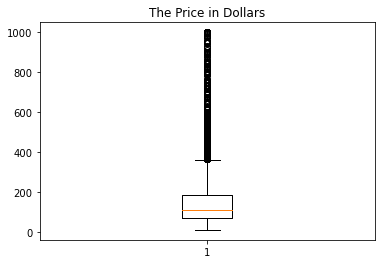

In [210]:
#Create the boxplot of the variables 'availability_365' and 'price'
import matplotlib.pyplot as plt
import numpy as np
# Creating plot
plt.boxplot(Dataset.price)
plt.title("The Price in Dollars")
# show plot
plt.show()

In [211]:
#Delete all the records with the outliers in price
Dataset=Dataset[Dataset.price<=301]

In [212]:
#We can observe that there are some outliers above the value of 400 dollars price as indicated from its skewness and kurtois as well 

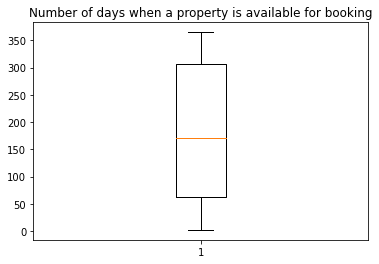

In [213]:
#Creating plot
plt.boxplot(Dataset.availability_365)
plt.title("Number of days when a property is available for booking")
#Show plot
plt.show()
#We can observe that there are no outliers within this variable as indicated from its skewness and kurotis as well

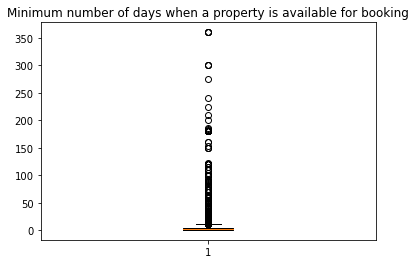

In [214]:
#Creating plot
plt.boxplot(Dataset.minimum_nights)
plt.title("Minimum number of days when a property is available for booking")
#Show plot
plt.show()

In [215]:
#Delete all the records with the outliers in minimum nights
Dataset=Dataset[Dataset.minimum_nights<7]

In [216]:
Dataset

id    host_id neighbourhood_group       neighbourhood  latitude  \
0          2539       2787            Brooklyn          Kensington  40.64749   
1          2595       2845           Manhattan             Midtown  40.75362   
2          3647       4632           Manhattan              Harlem  40.80902   
3          3831       4869            Brooklyn        Clinton Hill  40.68514   
5          5099       7322           Manhattan         Murray Hill  40.74767   
...         ...        ...                 ...                 ...       ...   
48888  36484087  274321313           Manhattan      Hell's Kitchen  40.76392   
48889  36484363  107716952              Queens             Jamaica  40.69137   
48890  36484665    8232441            Brooklyn  Bedford-Stuyvesant  40.67853   
48891  36485057    6570630            Brooklyn            Bushwick  40.70184   
48893  36485609   30985759           Manhattan      Hell's Kitchen  40.75751   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
5      -73.97500  Entire home/apt    200               3                 74   
...          ...              ...    ...             ...                ...   
48888  -73.99183     Private room    125               4                  0   
48889  -73.80844     Private room     65               1                  0   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48893  -73.99112      Shared room     55               1                  0   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2                                   1               365  
3                                   1               194  
5                                   1               129  
...                               ...               ...  
48888                               1                31  
48889                               2               163  
48890                               2                 9  
48891                               2                36  
48893                               6                 2  

[21780 rows x 12 columns]

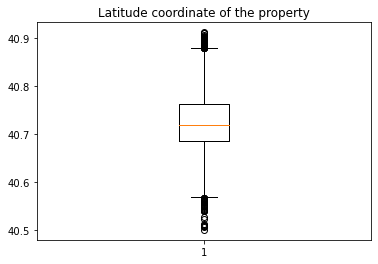

In [217]:
#Creating plot
plt.boxplot(Dataset.latitude)
plt.title("Latitude coordinate of the property")
#Show plot
plt.show()
#In this situation we presevre the outliers since they are too close to the upper and lower boundaries 

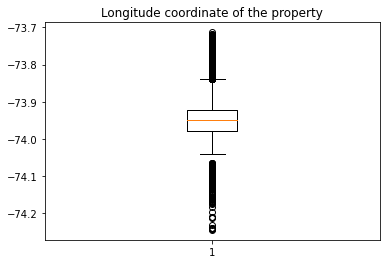

In [218]:
#Creating plot
plt.boxplot(Dataset.longitude)
plt.title("Longitude coordinate of the property")
#Show plot
plt.show()
#In this situation we presevre the outliers since they are too close to the upper and lower boundaries  

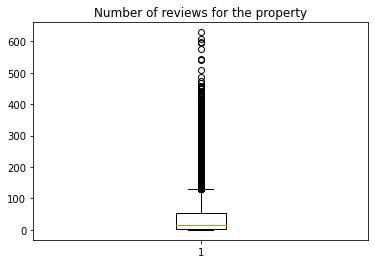

In [219]:
#Creating plot
plt.boxplot(Dataset.number_of_reviews)
plt.title("Number of reviews for the property")
#Show plot
plt.show()
#We will presevre the outliers since this boxplot corresponds to reality(for some properties theere are too many reviews)

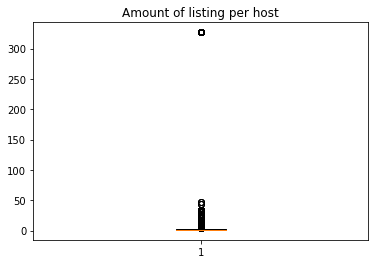

In [220]:
#Creating plot
plt.boxplot(Dataset.calculated_host_listings_count)
plt.title("Amount of listing per host")
#Show plot
plt.show()
#We are not in a position to tell that the outliers are due to errors since there are reach people who belong too many properties 

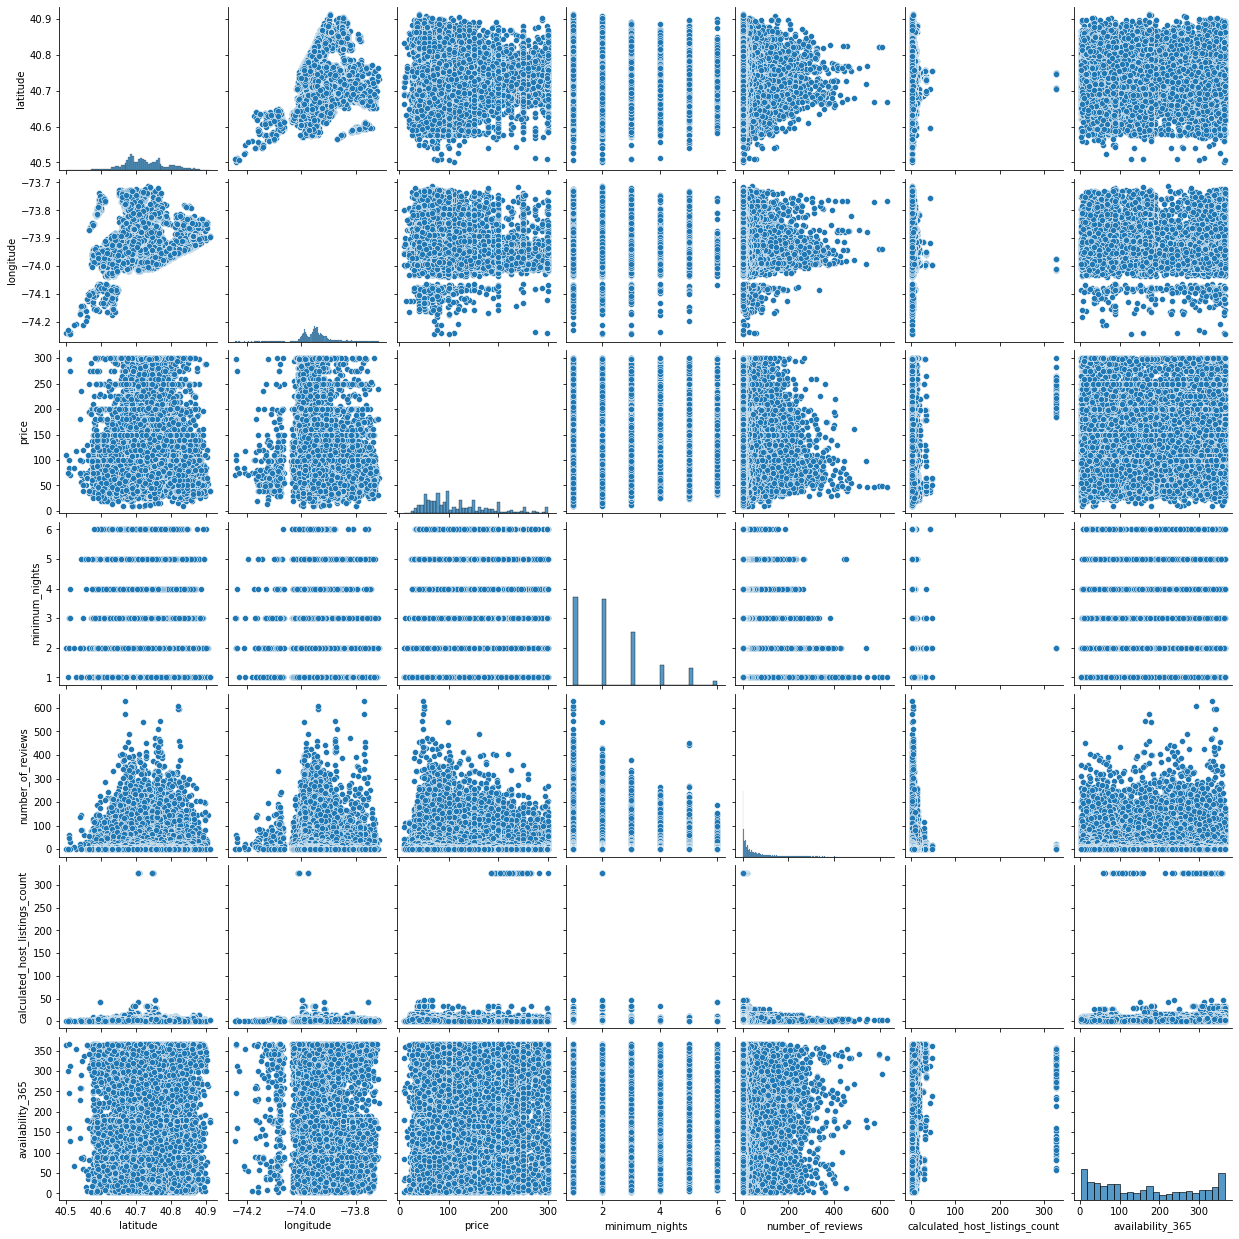

In [221]:
#Perfom the scatterplot between the numerical variables to confirm the above correlations
sns.pairplot(Dataset[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']])

In [222]:
#Calculation of the correlation among the numerical variables of our dataset with the spearman method since this is more accorate method than pearson, when we dont deal with variables where exist linear relationship (as indicated in the pairwise-scatter plots above there is no demonstration that linear relationship exists among the numerical variables of our dataset)
Correlation=Dataset[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].corr(method='spearman')

<AxesSubplot:>

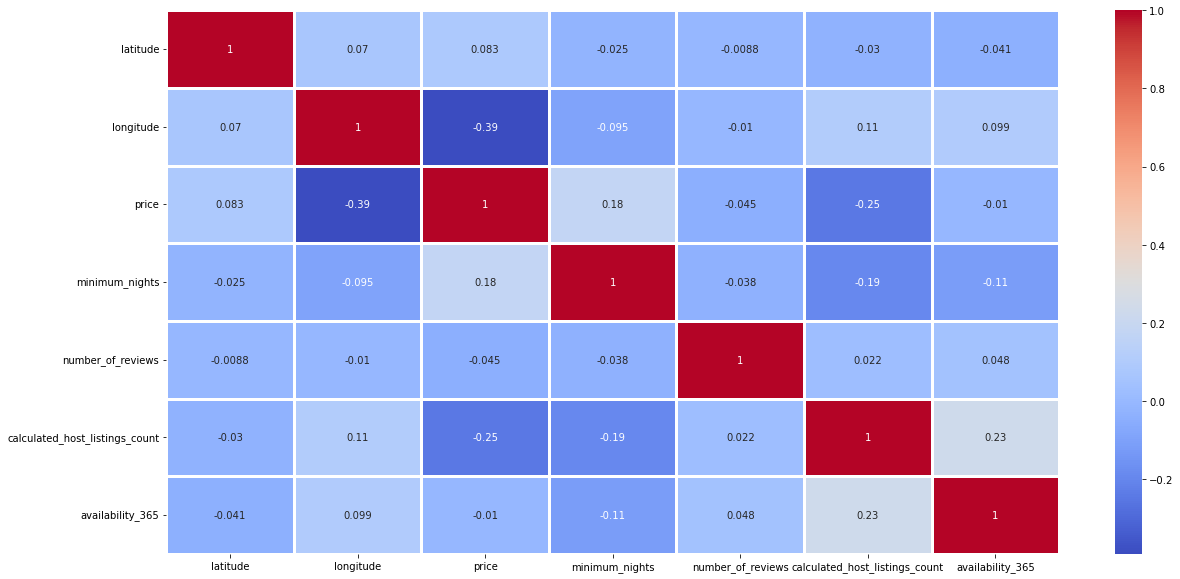

In [223]:
#Display the heatmap in which we can observe the value of the correlation among the numerical variables
plt.figure(figsize=(20,10))
sns.heatmap(Correlation,annot=True,cmap='coolwarm',linecolor='white',linewidths=3)

In [224]:
Dataset

id    host_id neighbourhood_group       neighbourhood  latitude  \
0          2539       2787            Brooklyn          Kensington  40.64749   
1          2595       2845           Manhattan             Midtown  40.75362   
2          3647       4632           Manhattan              Harlem  40.80902   
3          3831       4869            Brooklyn        Clinton Hill  40.68514   
5          5099       7322           Manhattan         Murray Hill  40.74767   
...         ...        ...                 ...                 ...       ...   
48888  36484087  274321313           Manhattan      Hell's Kitchen  40.76392   
48889  36484363  107716952              Queens             Jamaica  40.69137   
48890  36484665    8232441            Brooklyn  Bedford-Stuyvesant  40.67853   
48891  36485057    6570630            Brooklyn            Bushwick  40.70184   
48893  36485609   30985759           Manhattan      Hell's Kitchen  40.75751   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
5      -73.97500  Entire home/apt    200               3                 74   
...          ...              ...    ...             ...                ...   
48888  -73.99183     Private room    125               4                  0   
48889  -73.80844     Private room     65               1                  0   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48893  -73.99112      Shared room     55               1                  0   

       calculated_host_listings_count  availability_365  
0                                   6               365  
1                                   2               355  
2                                   1               365  
3                                   1               194  
5                                   1               129  
...                               ...               ...  
48888                               1                31  
48889                               2               163  
48890                               2                 9  
48891                               2                36  
48893                               6                 2  

[21780 rows x 12 columns]

In [225]:
#Display the updated statistical summary of the new dataset created(after deleting some varibales and records as shown above) for the numerical variables 
Dataset[['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].describe()

latitude     longitude         price  minimum_nights  \
count  21780.000000  21780.000000  21780.000000    21780.000000   
mean      40.725880    -73.942475    119.255464        2.270983   
std        0.059818      0.055147     66.551522        1.250312   
min       40.499790    -74.244420     10.000000        1.000000   
25%       40.685080    -73.978950     67.000000        1.000000   
50%       40.718365    -73.948985    100.000000        2.000000   
75%       40.763220    -73.923340    158.000000        3.000000   
max       40.913060    -73.712990    301.000000        6.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       21780.000000                    21780.000000      21780.000000  
mean           40.145317                        4.429293        166.025115  
std            57.061100                       26.327039        122.668684  
min             0.000000                        1.000000          2.000000  
25%             4.000000                        1.000000         53.000000  
50%            17.000000                        1.000000        150.500000  
75%            54.000000                        2.000000        284.000000  
max           629.000000                      327.000000        365.000000

In [226]:
#Display the updated statistical summary of the new dataset created(after deleting some varibales and records as shown above) for the categorical variables
Dataset[['id','host_id','neighbourhood_group','neighbourhood','room_type']].describe()

id    host_id neighbourhood_group       neighbourhood     room_type
count   21780      21780               21780               21780         21780
unique  21780      16364                   5                 217             3
top      2539  219517861            Brooklyn  Bedford-Stuyvesant  Private room
freq        1        142                9239                1958         11250

In [227]:
#Plot the data distribution of the price(price in dollars) and availability_365(number of days when listing is available for booking)

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

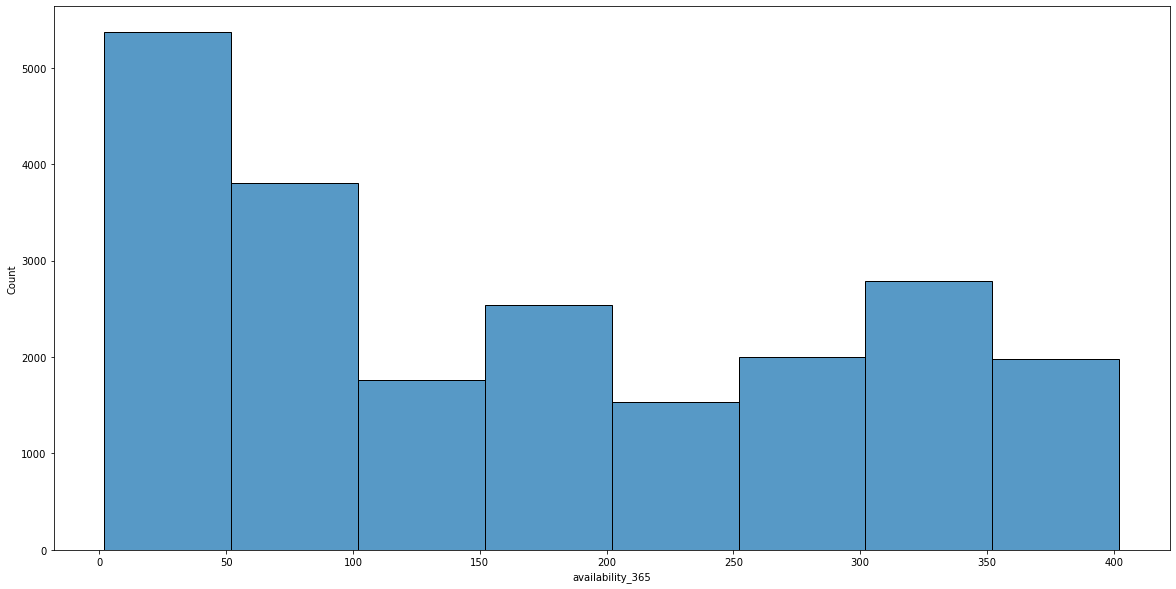

In [228]:
#Plot the histogram of the 'availability_365'(number of days when listing is available for booking) and get a general idea of the distribution  
plt.figure(figsize=(20,10))
sns.histplot(data=Dataset,x='availability_365',binwidth=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

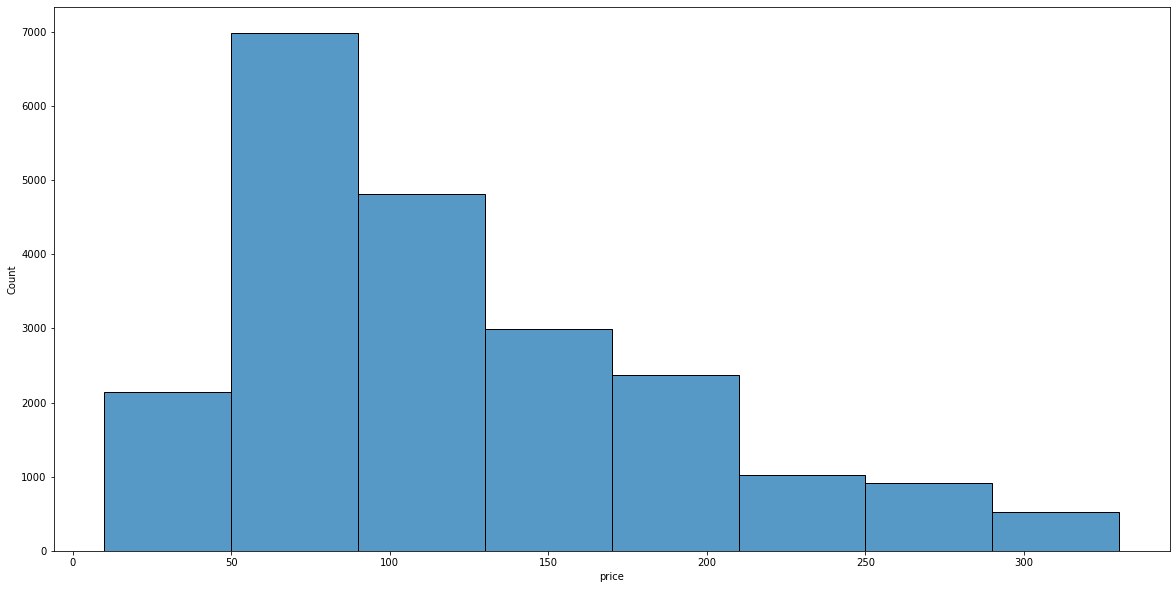

In [229]:
#Plot the histogram of the price variable and get a general idea of the distribution
plt.figure(figsize=(20,10))
sns.histplot(data=Dataset,x='price',binwidth=40)

Text(0.5, 1.0, 'Type of properties')

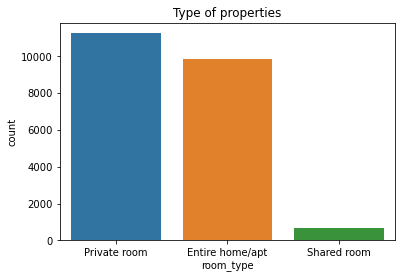

In [230]:
#What type of properties are most commonly listed on New York City Airbnb Open Data
#We can observe that private rooms are the most commonly listed followed by entire home/apt room types with a small difference
#We can also observe that the minority is the shared room type with a big difference from the rest categories
from matplotlib import pyplot as plt
sns.countplot(data=Dataset,x='room_type')
plt.title("Type of properties")

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

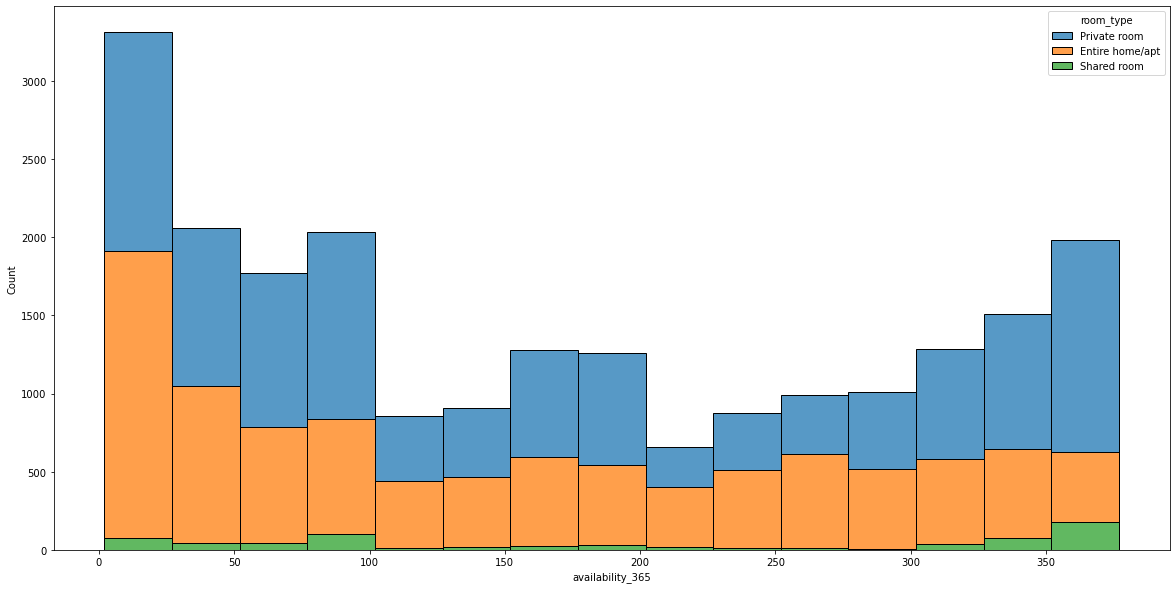

In [231]:
#How does the property type affect the price? 
#Plot the histogram of the 'availability_365'(number of days when listing is available for booking)
#There is not a significant pattern here in relevance to the room_types(they are almost equally spread)
#However we can opbserve that most of the properties are available between 10-100 days or 300-365 days
plt.figure(figsize=(20,10))
sns.histplot(data=Dataset,x='availability_365',binwidth=25,hue='room_type',multiple="stack") 

<AxesSubplot:xlabel='price', ylabel='Count'>

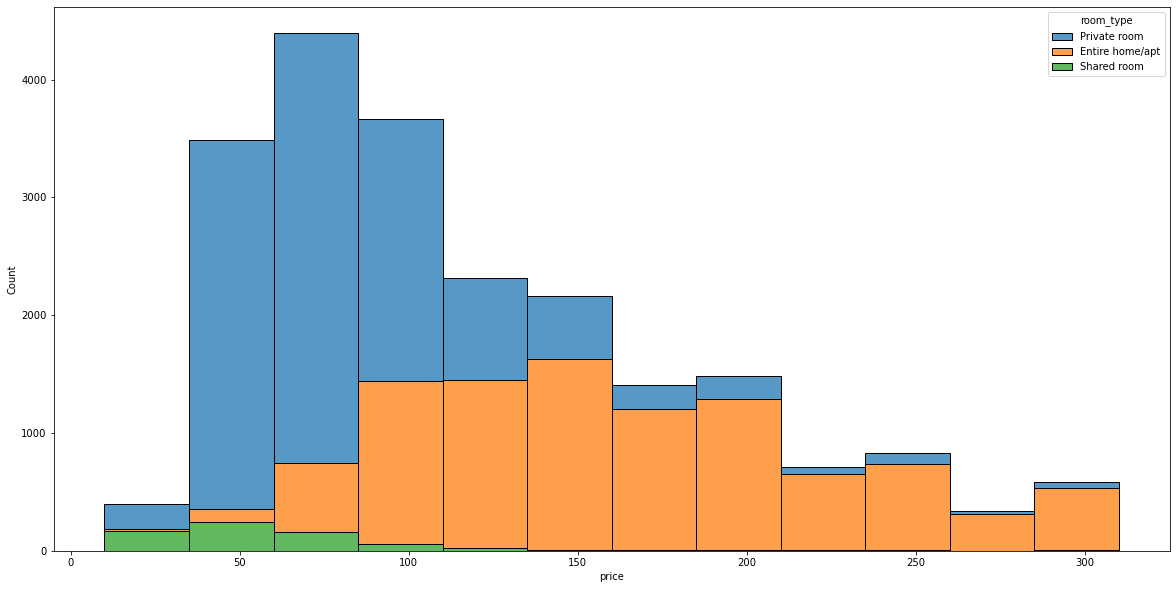

In [232]:
#Plot the histogram of the 'availability_365'(number of days when listing is available for booking) 
#We can observe that Entire home/apt are more expensive than private rooms.Also shared rooms are the cheapest properties
#we can observe that there is a pattern as regards the room types and prices(entire home/apt seems to be the most expensive room type)
plt.figure(figsize=(20,10))
sns.histplot(data=Dataset,x='price',binwidth=25,hue='room_type',multiple='stack')

In [233]:
#We should try to explain the above graphs with the following contigency table and our personal experience(criticality)
#Maybe some areas are more expensive than others and some areas are only approachable only a limited number of days within a year  
data_crosstab = pd.crosstab(Dataset['room_type'], 
                            Dataset['neighbourhood_group'],
                                margins = False)
print(data_crosstab)

neighbourhood_group  Bronx  Brooklyn  Manhattan  Queens  Staten Island
room_type                                                             
Entire home/apt        259      4307       3882    1260            135
Private room           501      4719       3705    2170            155
Shared room             43       213        278     145              8


In [234]:
#Machine Learning algorithms

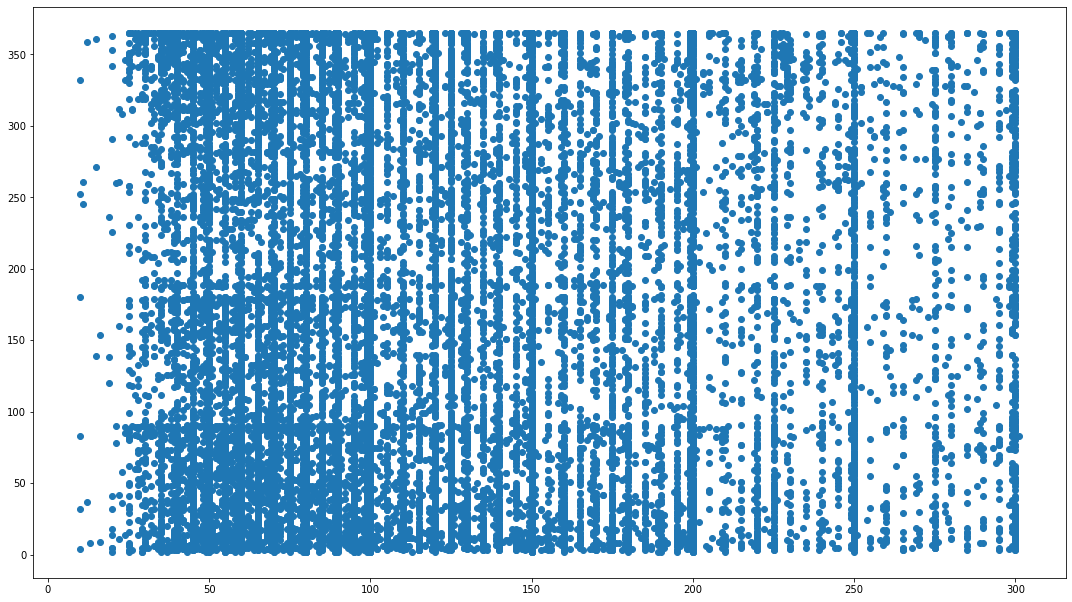

In [235]:
#Create the scatter plot between the 'price' and 'availability' variables which I am going to perform a clustering algorithm(get an initial perception of the variables) 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(Dataset.price,Dataset.availability_365)

In [236]:
from sklearn.cluster import KMeans

In [237]:
#Perform clustering using 6 clusters
km=KMeans(n_clusters=6)
km

KMeans(n_clusters=6)

In [238]:
#Assign each record into one cluster of the 6 clusters created previously
y_predicted=km.fit_predict(Dataset[['price','availability_365']])
print(y_predicted)

[0 0 0 ... 1 1 1]


In [239]:
#Append on the current dataset another one column which shows the clustering of each record
Dataset['clusters']=y_predicted
Dataset

id    host_id neighbourhood_group       neighbourhood  latitude  \
0          2539       2787            Brooklyn          Kensington  40.64749   
1          2595       2845           Manhattan             Midtown  40.75362   
2          3647       4632           Manhattan              Harlem  40.80902   
3          3831       4869            Brooklyn        Clinton Hill  40.68514   
5          5099       7322           Manhattan         Murray Hill  40.74767   
...         ...        ...                 ...                 ...       ...   
48888  36484087  274321313           Manhattan      Hell's Kitchen  40.76392   
48889  36484363  107716952              Queens             Jamaica  40.69137   
48890  36484665    8232441            Brooklyn  Bedford-Stuyvesant  40.67853   
48891  36485057    6570630            Brooklyn            Bushwick  40.70184   
48893  36485609   30985759           Manhattan      Hell's Kitchen  40.75751   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
5      -73.97500  Entire home/apt    200               3                 74   
...          ...              ...    ...             ...                ...   
48888  -73.99183     Private room    125               4                  0   
48889  -73.80844     Private room     65               1                  0   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48893  -73.99112      Shared room     55               1                  0   

       calculated_host_listings_count  availability_365  clusters  
0                                   6               365         0  
1                                   2               355         0  
2                                   1               365         0  
3                                   1               194         2  
5                                   1               129         3  
...                               ...               ...       ...  
48888                               1                31         1  
48889                               2               163         2  
48890                               2                 9         1  
48891                               2                36         1  
48893                               6                 2         1  

[21780 rows x 13 columns]

In [240]:
#Seperate the initial Dataset into 6 subdatasets each one including records of the same cluster
Dataset1=Dataset[Dataset.clusters==0]
Dataset2=Dataset[Dataset.clusters==1]
Dataset3=Dataset[Dataset.clusters==2]
Dataset4=Dataset[Dataset.clusters==3]
Dataset5=Dataset[Dataset.clusters==4]
Dataset6=Dataset[Dataset.clusters==5]

Text(0, 0.5, 'Availability(days)')

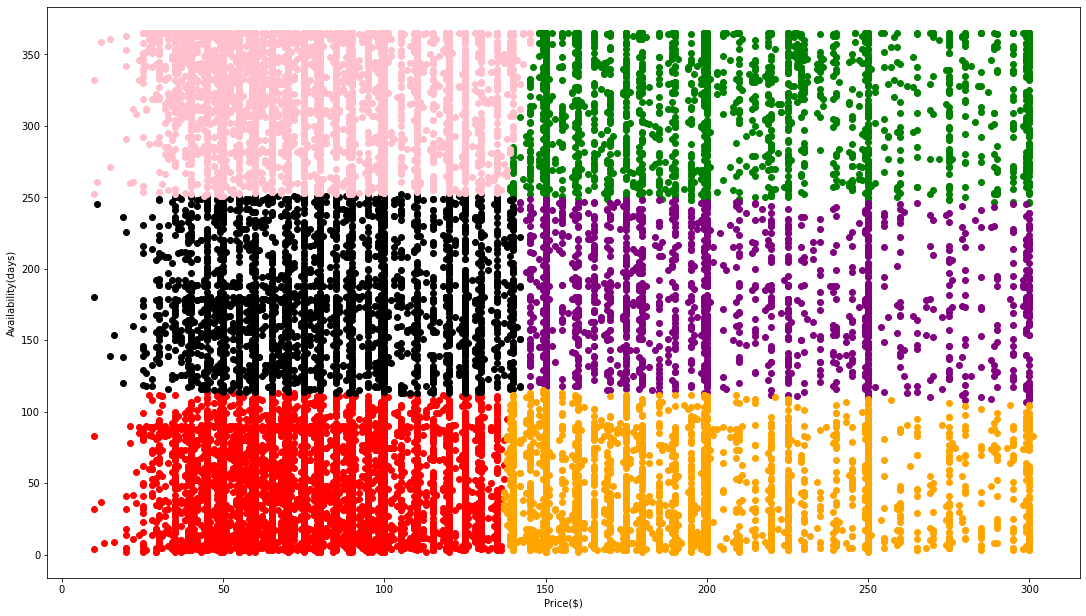

In [241]:
#Plot the scatter plot of the variables of interest(different colors represent different clusters) 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(Dataset1.price,Dataset1.availability_365,color='green')
plt.scatter(Dataset2.price,Dataset2.availability_365,color='red')
plt.scatter(Dataset3.price,Dataset3.availability_365,color='black')
plt.scatter(Dataset4.price,Dataset4.availability_365,color='purple')
plt.scatter(Dataset5.price,Dataset5.availability_365,color='orange')
plt.scatter(Dataset6.price,Dataset6.availability_365,color='pink')
plt.xlabel('Price($)')
plt.ylabel('Availability(days)')

In [242]:
import numpy as np
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [243]:
#Convert the scaling of the variables 'price' and 'availability_365' into the interval [0,1] so that there is no difference in the range of the axes which can affect the algorithm 
Dataset['price']=NormalizeData(Dataset['price'])
Dataset['availability_365']=NormalizeData(Dataset['availability_365'])
Dataset

id    host_id neighbourhood_group       neighbourhood  latitude  \
0          2539       2787            Brooklyn          Kensington  40.64749   
1          2595       2845           Manhattan             Midtown  40.75362   
2          3647       4632           Manhattan              Harlem  40.80902   
3          3831       4869            Brooklyn        Clinton Hill  40.68514   
5          5099       7322           Manhattan         Murray Hill  40.74767   
...         ...        ...                 ...                 ...       ...   
48888  36484087  274321313           Manhattan      Hell's Kitchen  40.76392   
48889  36484363  107716952              Queens             Jamaica  40.69137   
48890  36484665    8232441            Brooklyn  Bedford-Stuyvesant  40.67853   
48891  36485057    6570630            Brooklyn            Bushwick  40.70184   
48893  36485609   30985759           Manhattan      Hell's Kitchen  40.75751   

       longitude        room_type     price  minimum_nights  \
0      -73.97237     Private room  0.477663               1   
1      -73.98377  Entire home/apt  0.738832               1   
2      -73.94190     Private room  0.481100               3   
3      -73.95976  Entire home/apt  0.271478               1   
5      -73.97500  Entire home/apt  0.652921               3   
...          ...              ...       ...             ...   
48888  -73.99183     Private room  0.395189               4   
48889  -73.80844     Private room  0.189003               1   
48890  -73.94995     Private room  0.206186               2   
48891  -73.93317     Private room  0.103093               4   
48893  -73.99112      Shared room  0.154639               1   

       number_of_reviews  calculated_host_listings_count  availability_365  \
0                      9                               6          1.000000   
1                     45                               2          0.972452   
2                      0                               1          1.000000   
3                    270                               1          0.528926   
5                     74                               1          0.349862   
...                  ...                             ...               ...   
48888                  0                               1          0.079890   
48889                  0                               2          0.443526   
48890                  0                               2          0.019284   
48891                  0                               2          0.093664   
48893                  0                               6          0.000000   

       clusters  
0             0  
1             0  
2             0  
3             2  
5             3  
...         ...  
48888         1  
48889         2  
48890         1  
48891         1  
48893         1  

[21780 rows x 13 columns]

In [244]:
#Perform once again the clustering algorithm to observe if there are any differences in relevance to the perfomance of the scaled variables
km=KMeans(n_clusters=6)
y_predicted=km.fit_predict(Dataset[['price','availability_365']])
y_predicted

array([2, 0, 0, ..., 3, 3, 3])

In [245]:
#Replace on the current dataset the updated clusters which shows the updated clustering of each record
Dataset['clusters']=y_predicted
Dataset

id    host_id neighbourhood_group       neighbourhood  latitude  \
0          2539       2787            Brooklyn          Kensington  40.64749   
1          2595       2845           Manhattan             Midtown  40.75362   
2          3647       4632           Manhattan              Harlem  40.80902   
3          3831       4869            Brooklyn        Clinton Hill  40.68514   
5          5099       7322           Manhattan         Murray Hill  40.74767   
...         ...        ...                 ...                 ...       ...   
48888  36484087  274321313           Manhattan      Hell's Kitchen  40.76392   
48889  36484363  107716952              Queens             Jamaica  40.69137   
48890  36484665    8232441            Brooklyn  Bedford-Stuyvesant  40.67853   
48891  36485057    6570630            Brooklyn            Bushwick  40.70184   
48893  36485609   30985759           Manhattan      Hell's Kitchen  40.75751   

       longitude        room_type     price  minimum_nights  \
0      -73.97237     Private room  0.477663               1   
1      -73.98377  Entire home/apt  0.738832               1   
2      -73.94190     Private room  0.481100               3   
3      -73.95976  Entire home/apt  0.271478               1   
5      -73.97500  Entire home/apt  0.652921               3   
...          ...              ...       ...             ...   
48888  -73.99183     Private room  0.395189               4   
48889  -73.80844     Private room  0.189003               1   
48890  -73.94995     Private room  0.206186               2   
48891  -73.93317     Private room  0.103093               4   
48893  -73.99112      Shared room  0.154639               1   

       number_of_reviews  calculated_host_listings_count  availability_365  \
0                      9                               6          1.000000   
1                     45                               2          0.972452   
2                      0                               1          1.000000   
3                    270                               1          0.528926   
5                     74                               1          0.349862   
...                  ...                             ...               ...   
48888                  0                               1          0.079890   
48889                  0                               2          0.443526   
48890                  0                               2          0.019284   
48891                  0                               2          0.093664   
48893                  0                               6          0.000000   

       clusters  
0             2  
1             0  
2             0  
3             5  
5             4  
...         ...  
48888         1  
48889         5  
48890         3  
48891         3  
48893         3  

[21780 rows x 13 columns]

In [246]:
#Seperate the initial Dataset into 6 subdatasets each one including records of the same cluster
Dataset1=Dataset[Dataset.clusters==0]
Dataset2=Dataset[Dataset.clusters==1]
Dataset3=Dataset[Dataset.clusters==2]
Dataset4=Dataset[Dataset.clusters==3]
Dataset5=Dataset[Dataset.clusters==4]
Dataset6=Dataset[Dataset.clusters==5]

In [247]:
#Display the 6 centroids of the clustering algorithm 
km.cluster_centers_

array([[0.67506682, 0.82139991],
       [0.49644286, 0.11879468],
       [0.23456871, 0.89264796],
       [0.2117784 , 0.13098016],
       [0.79760894, 0.27165775],
       [0.28162627, 0.49081989]])

Text(0.5, 1.0, 'The prerformance of the clustering algorithm(centroids are displayed with the symbol +')

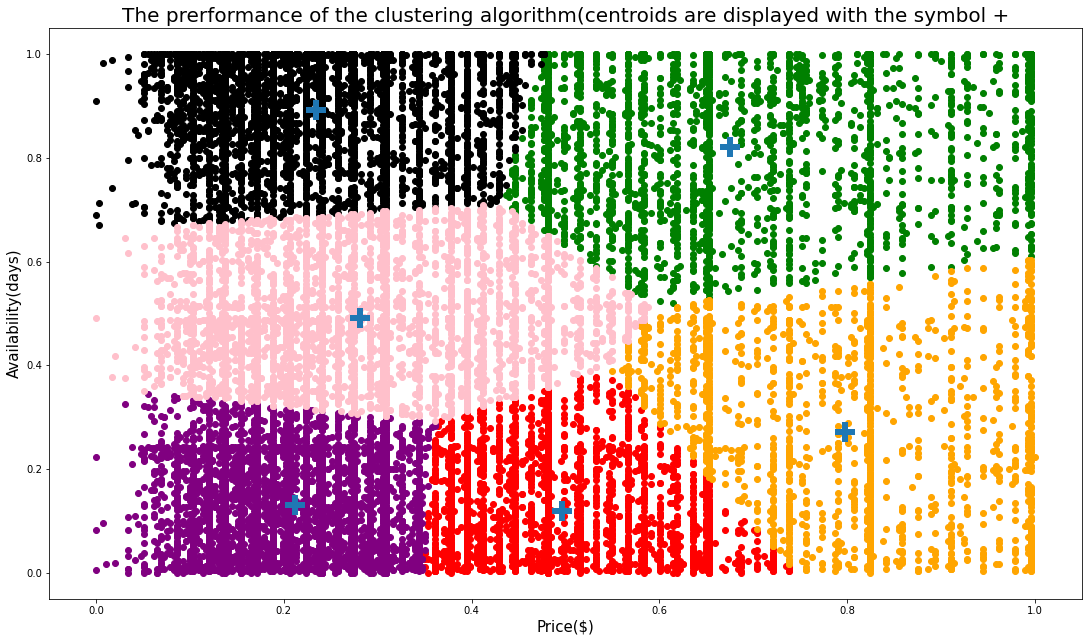

In [263]:
#Plot the scatter plot of the variables of interest(different colors represent different clusters) 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(Dataset1.price,Dataset1.availability_365,color='green')
plt.scatter(Dataset2.price,Dataset2.availability_365,color='red')
plt.scatter(Dataset3.price,Dataset3.availability_365,color='black')
plt.scatter(Dataset4.price,Dataset4.availability_365,color='purple')
plt.scatter(Dataset5.price,Dataset5.availability_365,color='orange')
plt.scatter(Dataset6.price,Dataset6.availability_365,color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',label='centorid',linewidths=20)
plt.xlabel('Price($)',size=15)
plt.ylabel('Availability(days)',size=15)
plt.title('The prerformance of the clustering algorithm(centroids are displayed with the symbol +',size=20)

In [269]:
#Calculate the Sum of Squares Error value for different number of clusters
k_range=range(1,10)
Sum_of_Squares_Error=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(Dataset[['price','availability_365']])
    Sum_of_Squares_Error.append(km.inertia_)

In [270]:
#We can observe that while increasing the number of clusters the Sum of Squares Error is decreasing(howver the error is still to large since there exist too many records within our dataset)
Sum_of_Squares_Error

[3626.2093829469577,
 1638.0904004749398,
 1147.1762107774987,
 812.4973203168278,
 591.9852229521065,
 505.1213411142217,
 434.3047949741898,
 380.4684527409508,
 338.70938088624126]

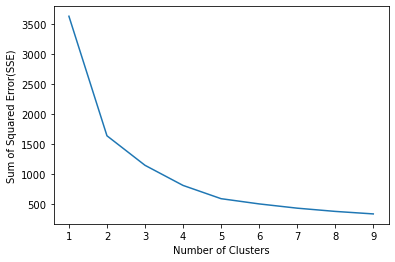

In [272]:
#Using the elbow rule we can observe that the best choice for number of clusters to perfom our algorithm is 5.
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error(SSE)')
plt.plot(k_range,Sum_of_Squares_Error)